In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole

In [2]:
mol1 = Chem.MolFromSmiles('CCc1ccccc1')
mol2 = Chem.MolFromSmiles('CCc1nnccc1')

In [3]:
AllChem.EmbedMolecule(mol1)

0

In [4]:
IPythonConsole.drawMol3D(mol1, size=(200,200))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
mcs = rdFMCS.FindMCS([mol1, mol2])
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

In [6]:
ref_match = mol1.GetSubstructMatch(mcs_mol)
target_match = mol2.GetSubstructMatch(mcs_mol)

In [7]:
print(ref_match, target_match)

(0, 1, 2, 3, 4, 5) (0, 1, 2, 7, 6, 5)


In [8]:
rwmol = Chem.RWMol(mcs_mol)

In [9]:
rwconf = Chem.Conformer(rwmol.GetNumAtoms())
matches = rwmol.GetSubstructMatch(mcs_mol)

In [10]:
ref_conf = mol1.GetConformer()
for i, match in enumerate(matches):
    print(ref_conf.GetAtomPosition(ref_match[i]).x)
    rwconf.SetAtomPosition(match, ref_conf.GetAtomPosition(ref_match[i]))

    

2.797503065062055
1.9965837331267733
0.5291080593215798
-0.09836576154290043
-1.444598670619997
-2.1521053683742934


In [18]:
for i in matches:
    pos=rwconf.GetAtomPosition(i)
    print(pos.x, pos.y, pos.z)

2.797503065062055 0.08393698531448948 0.7058212432454596
1.9965837331267733 0.04091937598459714 -0.5635829154801455
0.5291080593215798 0.00932480299515561 -0.2802135129357946
-0.09836576154290043 -1.2078412356493724 -0.13145634839820414
-1.444598670619997 -1.2253207297818316 0.12824947496784708
-2.1521053683742934 -0.05441461335304368 0.2376898645891146


In [12]:
rwmol.AddConformer(rwconf)

0

In [13]:
IPythonConsole.drawMol3D(rwmol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

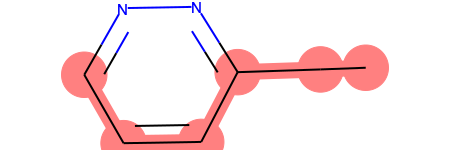

In [14]:
AllChem.ConstrainedEmbed(mol2, rwmol)

In [15]:
IPythonConsole.drawMol3D(mol2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
print(Chem.MolToMolBlock(mol1))
print(Chem.MolToMolBlock(mol1))